In [1]:
import UWGeodynamics as GEO
import matplotlib.pyplot as plt
import numpy as np
import underworld as uw
import underworld.function as fn
import glucifer

u = GEO.UnitRegistry

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
half_rate     = 1. * u.centimeter / u.year 
model_length  = 40. * u.kilometer
model_height  = 24. * u.kilometer
#topTemp       = 0+273
#baseTemp      = 100+213
surfaceTemp   = 273 * u.degK
baseModelTemp = 360 * u.degK # no data 
bodyforce     = 2700 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2 # 1530

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)


GEO.scaling_coefficients["[length]"]      = KL
GEO.scaling_coefficients["[time]"]        = Kt
GEO.scaling_coefficients["[mass]"]        = KM
GEO.scaling_coefficients["[temperature]"] = KT



In [3]:
resolution = (512,128)

Model = GEO.Model(elementRes=resolution, 
                  minCoord=(0. * u.kilometer, -11.4 * u.kilometer), 
                  maxCoord=(40. * u.kilometer, 12.6 * u.kilometer),
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

Model.outputDir="outputs_mixe"


# In[6]:

Model.minViscosity  = 1e18 * u.pascal * u.second
Model.maxViscosity  = 5e23 * u.pascal * u.second
Model.stressLimiter = 500. * u.megapascal
Model.diffusivity   = 1e-6 * u.metre**2 / u.second
Model.capacity      = 1000. * u.joule / (u.kelvin * u.kilogram)
# Model.minViscosity = 1.0e5 * u.pascal * u.second
# Model.maxViscosity = 1e12 * u.pascal * u.second

In [4]:
# polygons

era_polygon      = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -0.2*u.kilometer),
                                                (40.* u.kilometer, 0.*u.kilometer),
                                                (40.* u.kilometer, -2.4*u.kilometer),
                                                (0.* u.kilometer, -2.9*u.kilometer)])

orubadi_polygon  = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -2.9*u.kilometer),
                                                (40.* u.kilometer, -2.4*u.kilometer),
                                                (40.* u.kilometer, -4.7*u.kilometer),
                                                (0.* u.kilometer, -4.9*u.kilometer)])

aure_polygon     = GEO.shapes.Polygon(vertices=[(29.37* u.kilometer, -4.8*u.kilometer),
                                                (40.* u.kilometer, -4.2*u.kilometer),
                                                (40.* u.kilometer, -4.7*u.kilometer)])

puri_polygon     = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -4.9*u.kilometer),
                                                (40* u.kilometer, -4.7*u.kilometer),
                                                (40.* u.kilometer, -5.2*u.kilometer),
                                                (0.* u.kilometer, -5.4*u.kilometer)])

mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.4*u.kilometer),
                                                (40* u.kilometer, -5.2*u.kilometer),
                                                (40.* u.kilometer, -9.6*u.kilometer),
                                                (0.* u.kilometer, -9.6*u.kilometer)])

basement_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -6.4*u.kilometer),
                                                (22.5* u.kilometer, -7.4*u.kilometer),
                                                (26.* u.kilometer, -9.4*u.kilometer),
                                                (40* u.kilometer, -9.6*u.kilometer),
                                                (40.* u.kilometer, -16.*u.kilometer),
                                                (0.* u.kilometer, -16.*u.kilometer)])

decollement_orubadi_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -3.9*u.kilometer),
                                                (40.* u.kilometer, -3.7*u.kilometer),
                                                (40.* u.kilometer, -3.8*u.kilometer),
                                                (0.* u.kilometer, -4.*u.kilometer)])

decollement1_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.9*u.kilometer),
                                                (40.* u.kilometer, -6.1*u.kilometer),
                                                (40.* u.kilometer, -6.2*u.kilometer),
                                                (0.* u.kilometer, -6.*u.kilometer)])

decollement2_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(23.*u.kilometer, -8.9*u.kilometer),
                                                (40.* u.kilometer, -9.1*u.kilometer),
                                                (40.* u.kilometer, -9.2*u.kilometer),
                                                (23.* u.kilometer, -9.*u.kilometer)])

carbonate_polygon = GEO.shapes.Polygon(vertices=[(19.6*u.kilometer, -4.8*u.kilometer),
                                                (20.2* u.kilometer, -4.3*u.kilometer),
                                                (26.125* u.kilometer, -4.3*u.kilometer),
                                                (27.37* u.kilometer, -4.8*u.kilometer)])

In [5]:


air         = Model.add_material(name="Air", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
era         = Model.add_material(name="era",shape=era_polygon)
orubadi     = Model.add_material(name="orubadi", shape=orubadi_polygon)
aure        = Model.add_material(name="aure", shape=aure_polygon)
carbonate   = Model.add_material(name="carbonate", shape=carbonate_polygon)


purimendi   = Model.add_material(name="purimendi", shape=puri_polygon)
mesozoic    = Model.add_material(name="mesozoic", shape=mesozoic_polygon)

decollement_orubadi    = Model.add_material(name="decollement_orubadi", shape=decollement_orubadi_polygon)
decollement1_mesozoic  = Model.add_material(name="decollement1_mesozoic", shape=decollement1_mesozoic_polygon)
decollement2_mesozoic  = Model.add_material(name="decollement2_mesozoic", shape=decollement2_mesozoic_polygon)

basement    = Model.add_material(name="basement", shape=basement_polygon)





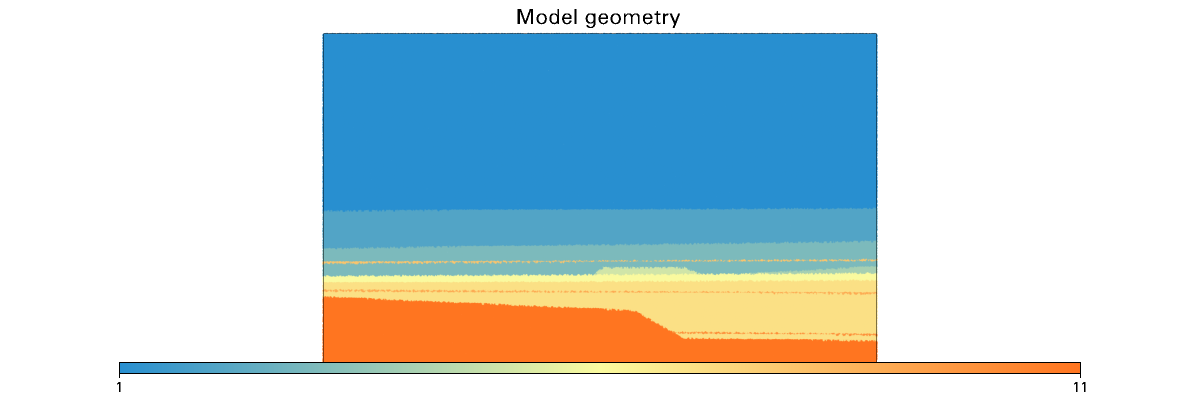

In [6]:
Fig = glucifer.Figure(figsize=(1200,400), title="Model geometry", quality=2)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.)
Fig.show()

In [7]:
# Compressibility should be zero when using Lecode isostasy
#air.diffusivity   = 22e-6 * u.metre**2 / u.second# air.capacity = 100. * u.joule / (u.kelvin * u.kilogram)
air.diffusivity = 1.0e-6 * u.metre**2 / u.second
air.capacity = 1000. * u.joule / (u.kelvin * u.kilogram)


## Density

air.density       = 1. * u.kilogram / u.metre**3
era.density       = GEO.LinearDensity(2250. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
orubadi.density   = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
aure.density      = GEO.LinearDensity(2400. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
purimendi.density = GEO.LinearDensity(2650. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
basement.density  = GEO.LinearDensity(2900. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
carbonate.density = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)

decollement_orubadi.density    = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
decollement1_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
decollement2_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)


## or:

# air.density       = 1. * u.kilogram / u.metre**3
# era.density       = 2250. * u.kilogram / u.metre**3
# orubadi.density   = 2350. * u.kilogram / u.metre**3
# aure.density      = 2400. * u.kilogram / u.metre**3 # no data
# purimendi.density = 2600. * u.kilogram / u.metre**3 
# mesozoic.density  = 2700. * u.kilogram / u.metre**3 
# basement.density  = 2900. * u.kilogram / u.metre**3 # no data 2500. to 2900.

# decollement_orubadi.density    = 2350. * u.kilogram / u.metre**3
# decollement1_mesozoic.density  = 2700. * u.kilogram / u.metre**3
# decollement2_mesozoic.density  = 2700. * u.kilogram / u.metre**3

 

## Radioganic Heat Production # no data

# era.radiogenicHeatProd       = 1. * u.microwatt / u.meter**3
# orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# aure.radiogenicHeatProd      = 1. * u.microwatt / u.meter**3
# purimendi.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# mesozoic.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3
# basement.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3

# decollement_orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3


## Viscous Rheologies # no data so isoviscous

rh = GEO.ViscousCreepRegistry()



air.viscosity       = 1e18 * u.pascal * u.second
era.viscosity       = 0.8e22 * u.pascal * u.second
orubadi.viscosity   = 0.8e22 * u.pascal * u.second
aure.viscosity      = 1.2e22 * u.pascal * u.second
purimendi.viscosity = 1.2e22 * u.pascal * u.second
mesozoic.viscosity  = 1e22 * u.pascal * u.second
basement.viscosity  = 1e22 * u.pascal * u.second # 5e21 lower crust
# fault.viscosity              = 5e22 * u.pascal * u.second
carbonate.viscosity = 1.2e22 * u.pascal * u.second



decollement_orubadi.viscosity    = 1e22 * u.pascal * u.second #1e20
decollement1_mesozoic.viscosity  = 1e22 * u.pascal * u.second #1e20
decollement2_mesozoic.viscosity  = 1e22 * u.pascal * u.second #1e20


In [8]:


## Plasticities

pl = GEO.PlasticityRegistry()

# sediment.plasticity #same for uppercrust     = GEO.DruckerPrager(name="Sediment Plasticity",
#                                             cohesion=40. * u.megapascal,
#                                             cohesionAfterSoftening=4.0 * u.megapascal,
#                                             frictionCoefficient=0.268,
#                                             frictionAfterSoftening=0.0268,
#                                             epsilon1=0.0, epsilon2=0.15)
# sediment.stressLimiter  = 1000. * u.megapascal



era.plasticity = GEO.DruckerPrager(name="era_pl",
                                         cohesion=1. * u.megapascal, #20.
                                         cohesionAfterSoftening=0.2 * u.megapascal,
                                         frictionCoefficient=0.84,
                                         frictionAfterSoftening=0.5,
                                         epsilon1=0.1, epsilon2=0.25)

orubadi.plasticity = GEO.DruckerPrager(name="orubadi_pl",
                                        cohesion=5. * u.megapascal,
                                        cohesionAfterSoftening=1. * u.megapascal,
                                        frictionCoefficient=0.18,
                                        frictionAfterSoftening=0.05,
                                        epsilon1=0.1, epsilon2=0.25)

aure.plasticity  = GEO.DruckerPrager(name="aure_pl",
                                        cohesion=3. * u.megapascal,
                                        cohesionAfterSoftening=2. * u.megapascal,
                                        frictionCoefficient=0.84,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.1, epsilon2=0.25)

purimendi.plasticity = GEO.DruckerPrager(name="purimendi_pl",
                                        cohesion=1. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.577,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.1, epsilon2=0.25)

mesozoic.plasticity  = GEO.DruckerPrager(name="mesozoic_pl",
                                         cohesion=1. * u.megapascal,#30
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.268,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.1, epsilon2=0.25)

basement.plasticity  = GEO.DruckerPrager(name="basement_pl",
                                         cohesion=40. * u.megapascal, #try 20
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.2, 
                                         frictionAfterSoftening=0.577,
                                         epsilon1=0.1, epsilon2=0.25)

# fault.plasticity = GEO.DruckerPrager(name="fault_pl",
#                                      cohesion=20. * u.megapascal,
#                                      cohesionAfterSoftening=0.8 * u.megapascal,
#                                      frictionCoefficient=0.577,
#                                      frictionAfterSoftening=0.02308,
#                                      epsilon1=0.0, epsilon2=0.2)

carbonate.plasticity = purimendi.plasticity

decollement_orubadi.plasticity    = era.plasticity
decollement1_mesozoic.plasticity  = mesozoic.plasticity
decollement2_mesozoic.plasticity  = mesozoic.plasticity


era.stressLimiter = 75.0 * u.megapascal
orubadi.stressLimiter   = 75.0 * u.megapascal
aure.stressLimiter      = 75.0 * u.megapascal
purimendi.stressLimiter = 75.0 * u.megapascal
mesozoic.stressLimiter  = 75.0 * u.megapascal
basement.stressLimiter  = 150.0 * u.megapascal
#fault.stressLimiter = 50.0 * u.megapascal

carbonate.stressLimiter = purimendi.stressLimiter

decollement_orubadi.stressLimiter = 75.0 * u.megapascal
decollement1_mesozoic.stressLimiter = 75.0 * u.megapascal
decollement2_mesozoic.stressLimiter = 75.0 * u.megapascal




In [9]:
solidii = GEO.SolidusRegistry()
crust_solidus = solidii.Crustal_Solidus
mantle_solidus = solidii.Mantle_Solidus

liquidii = GEO.LiquidusRegistry()
crust_liquidus = liquidii.Crustal_Liquidus
mantle_liquidus = liquidii.Mantle_Liquidus

basement.add_melt_modifier(crust_solidus, crust_liquidus, 
                         latentHeatFusion=250.0 * u.kilojoules / u.kilogram / u.kelvin,
                         meltFraction=0.,
                         meltFractionLimit=0.3,
                         meltExpansion=0.13, 
                         viscosityChangeX1 = 0.15,
                         viscosityChangeX2 = 0.30,
                         viscosityChange = 1.0e-3
                        )



In [10]:
Model.set_temperatureBCs(top=273. * u.degK, 
                         bottom=313. * u.degK, 
                         materials=[(air, 273. * u.degK)])

Model.set_velocityBCs(left=[0. * u.kilometer / u.year, None],
                      right=[-0.33 * u.centimeter / u.year, None],
                      bottom = [None , 0.])




In [11]:
x_c, y_c = GEO.circles_grid(radius=0.5*u.kilometer, 
                     minCoord=[Model.minCoord[0], Model.bottom], 
                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])

FSE_Crust = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

In [12]:
Model.init_model()

In [13]:

import underworld.function as fn

def post_hook():
    coords = fn.input()
    zz = coords[0] / (GEO.nd(Model.maxCoord[0]) - GEO.nd(Model.minCoord[0]))
    fact = fn.math.pow(fn.math.tanh(zz*20.0) + fn.math.tanh((1.0-zz)*20.0) - fn.math.tanh(20.0), 7)
    Model.plasticStrain.data[:] = Model.plasticStrain.data[:] * fact.evaluate(Model.swarm)

Model.postSolveHook = post_hook


In [14]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Pressure (MPa)", quality=2)
# Fig.Surface(Model.mesh, GEO.Dimensionalize(Model.pressureField, u.megapascal), fn_size=2.0)
# Fig.show()

In [15]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
#GEO.rcParams["advection.diffusion.method"] = "SLCN"

In [16]:
x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 4800) 
y = 0. * u.kilometer

surface_tracers = Model.add_passive_tracers(name="Surface", vertices=[x, y])
moho_tracers = Model.add_passive_tracers(name="Moho", vertices=[x,y-5.*u.kilometer])
Lab_tracers = Model.add_passive_tracers(name="Lab", vertices=[x,y-10.*u.kilometer])

#x = 100. * u.kilometer
#y = np.linspace(Model.minCoord[1], Model.maxCoord[1], 1000) * u.kilometer
#vertical_tracers1 = Model.add_passive_tracers(vertices=[x,y])

x1 = 480. * u.kilometer
y1 = -20. * u.kilometer
pt1_tracer = Model.add_passive_tracers(name="Pt1", vertices=[x1, y1])

#P1 = Model.add_passive_tracers(vertices=[x1,y1])

#moho_tracers.add_tracked_field(Model.temperature, name="moho_tracers" , dataType="float", units=u.degK, count=1, overwrite=True)
#moho_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
moho_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#surface_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
surface_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#pt1_tracer.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
#pt1_tracer.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)
#pt1_tracers2 = Model.pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.temperature, name="Pt1_Temp", dataType="float", units=u.degK, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.pressureField, name="Pt1_Press", dataType="float", units=u.megapascal, count=1, overwrite=False)
pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=False)
#Moho = moho_tracers.add_variable( dataType="double", count=1 )

In [17]:
# x2 = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 1000) 
# y2 = -10. * u.kilometer
# level_tracers = Model.add_passive_tracers(name="Level", vertices=[x2,y2])
# level_tracers2 = Model.level_tracers.add_tracked_field(Model.strainRateField, name="Lev_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)


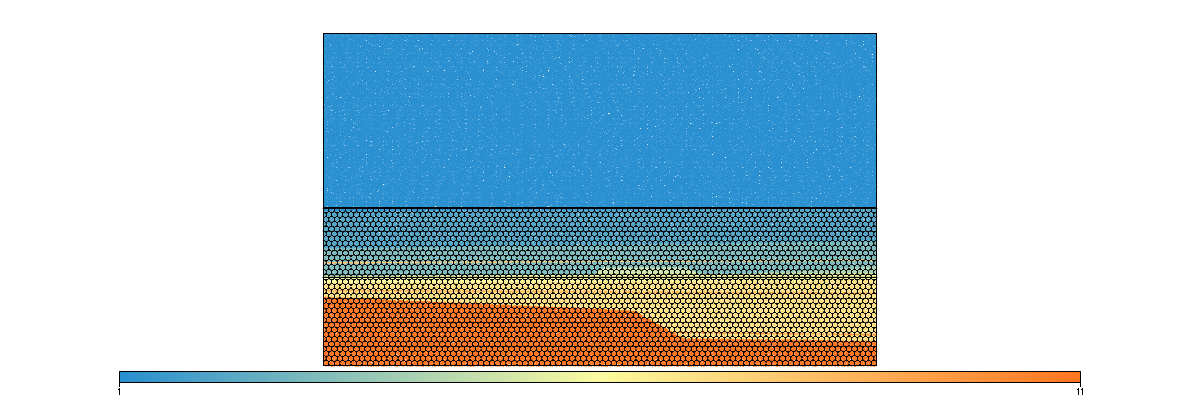

In [18]:
# x_c, y_c = GEO.circles_grid(radius=0.2*u.kilometer, 
#                     minCoord=[Model.minCoord[0], basement.top], 
#                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])
# circles_c = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

x_m, y_m = GEO.circles_grid(radius=0.2*u.kilometer, 
                    minCoord=[Model.minCoord[0], Model.bottom], 
                    maxCoord=[Model.maxCoord[0], 0.*u.kilometer])
circles_m = Model.add_passive_tracers(name="FSE_Mantle", vertices=[x_m, y_m])

import glucifer
Fig = glucifer.Figure(figsize=(1200,400), fn_size=4.0)
Fig.Points(surface_tracers.swarm, pointSize=2.0)
Fig.Points(moho_tracers.swarm, pointSize=2.0)
# Fig.Points(circles_c.swarm, pointSize=1.5)
Fig.Points(circles_m.swarm, pointSize=0.1)
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig.show()





In [19]:
# mohoT = Model.temperature.evaluate(moho_tracers.swarm)[:,0].mean()
# print("Moho Temperature = ", GEO.Dimensionalize(mohoT, u.degC)) 

# LabT = Model.temperature.evaluate(Lab_tracers.swarm)[:,0].mean()
# print("Lab Temperature = ", GEO.Dimensionalize(LabT, u.degC)) 


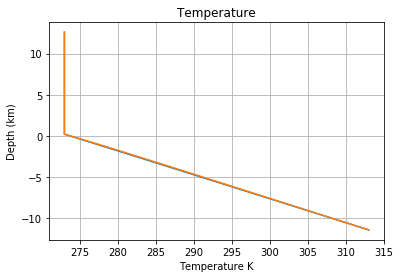

In [20]:

MyTemperatureField=(Model.temperature.data[:] * GEO.Dimensionalize(1.0, u.degK)).magnitude 

TemperatureData=np.asarray(MyTemperatureField)
#ViscosityDataShaped=ViscosityData.reshape(81,321)
TemperatureDataShaped=TemperatureData.reshape(resolution[1]+1,resolution[0]+1)

#Two profiles located at the left walls and the middle.
plt.plot(TemperatureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(TemperatureDataShaped[:, resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))

## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
#plt.xscale('log')
plt.xlabel('Temperature K')
plt.ylabel('Depth (km)')
plt.title('Temperature')
plt.show()



In [21]:
# MyPressureField=(Model.pressureField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# PressureData=np.asarray(MyPressureField)
# #ViscosityDataShaped=ViscosityData.reshape(81,321)
# PressureDataShaped=PressureData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.
# plt.plot(PressureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(PressureDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))

# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# #plt.xscale('log')
# plt.xlabel('Pressure MPa')
# plt.ylabel('Depth (km)')
# plt.title('Pressure')
# plt.show()




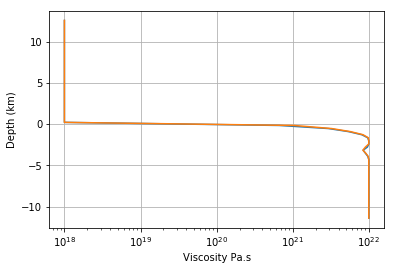

In [22]:
MyViscosityField=(Model.projViscosityField.data[:] * GEO.Dimensionalize(1.0, u.pascal * u.second)).magnitude 

ViscosityData=np.asarray(MyViscosityField)
#ViscosityDataShaped=ViscosityData.reshape(81,321)
ViscosityDataShaped=ViscosityData.reshape(resolution[1]+1,resolution[0]+1)

#Two profiles located at the left walls and the middle.
plt.plot(ViscosityDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(ViscosityDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))



## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
plt.xscale('log')
plt.xlabel('Viscosity Pa.s')
plt.ylabel('Depth (km)')
## plt.title('Viscosity')
plt.show()



In [23]:
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-2
GEO.rcParams["nonlinear.tolerance"] = 1e-2
#GEO.rcParams["solver"] = "mumps"
#GEO.rcParams["penalty"] = 0
GEO.rcParams["swarm.particles.per.cell.2D"] = 30

In [24]:
# Model.solve()


In [25]:
# MyStressField=(Model.projStressField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# StressData=np.asarray(MyStressField)
# #StressDataShaped=StressData.reshape(120,480)
# StressDataShaped=StressData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.

# plt.plot(StressDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(StressDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))


# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# plt.xlabel('Stress MPa')
# plt.ylabel('Depth (km)')
# plt.title('Deviatoric Stress')
# plt.show()

In [26]:
# Fig = glucifer.Figure(figsize=(1200,400), quality=2)
# Fig.VectorArrows(Model.mesh, GEO.Dimensionalize(Model.velocityField, u.millimeter / u.year), fn_size=2.0)
# Fig.show()

In [ ]:
#help(Model.run_for)
# Model.run_for(nstep=1000)
Model.run_for(10.0 * u.megayear, checkpoint_interval=0.05*u.megayear)

Running with UWGeodynamics version 2.7.7
Options:  -remove_constant_pressure_null_space False -ksp_k2_type NULL -change_backsolve False -pc_type none -force_correction True -Q22_pc_type gkgdiag -change_A11rhspresolve False -ksp_type bsscr -rescale_equations False -restore_K False -A11_pc_type lu -A11_pc_factor_mat_solver_package mumps -A11_ksp_type preonly -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 0.00 megayear dt: 0.00 megayear (2019-08-28 08:06:59)
Step:     2 Model Time: 0.00 megayear dt: 0.00 megayear (2019-08-28 08:07:07)
Step:     3 Model Time: 0.00 megayear dt: 0.00 megayear (2019-08-28 08:07:14)
Step:     4 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 08:07:22)
Step:     5 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 08:07:29)
Step:     6 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 08:07:37)
Step:     7 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 08:07:44)
Step:     8 Model Time: 0.01 mega